# <p style="background-color:#0B2545; font-family:calibri; color:#DCEEFF; font-size:150%; text-align:center; border-radius:15px 50px;">Capstone Project | Customer Segmentation </p>

<div style="border-radius:10px; padding: 15px; background-color: #0B2545; font-size:120%; text-align:left">

<h3 align="left"><font color=#DCEEFF>Problem:</font></h3>
  This Project focuses on segmneting e-commerce customer based on their purchasing behavior using RFM analysis and clustering techniques to enable data-driven marketing strategies

<div style="border-radius:10px; padding: 15px; background-color: #0B2545; font-size:115%; text-align:left">

<h3 align="left"><font color=#DCEEFF>Objectives:</font></h3>

* __Explore the Dataset__: To analyze customer transaction data and understand purchasing patterns using RFM (Recency, Frequency,
  Monetary) metrics.
* __Conduct Extensive Exploratory Data Analysis (EDA)__: To examine the spread and skewness of RFM features and to identify the presence   of outliers and variations in customer behavior.
* __Preprocessing Steps__:
  - To handle missing and invalid values in transactional data.
  - To apply log transformation on RFM variables to reduce skewness.
  - To scale features using StandardScaler to ensure distance-based models perform correctly.
  - Transform skewed features to achieve normal-like distributions
* __Model Building__:
  - To segment customers using K-Means clustering and determine the optimal number of clusters using Elbow Method and Silhouette Score.
  - To perform Hierarchical (Agglomerative) clustering and validate cluster formation using dendrograms and tree cut-off logic.
  - To apply DBSCAN clustering to identify density-based clusters and detect noise or outlier customers.
* __Evaluate and Compare Model Performance__:
  - To compare K-Means, Hierarchical Clustering, and DBSCAN based on interpretability, stability, and business usefulness.
  - To justify the selection of the most effective clustering technique for customer segmentation.




<a id="import"></a>
# <p style="background-color:#0B2545; font-family:calibri; color:#DCEEFF; font-size:150%; text-align:center; border-radius:15px 50px;">Step 1 | Import Libraries</p>

In [59]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans,DBSCAN
from sklearn.metrics import silhouette_score
from scipy.cluster.hierarchy import dendrogram,linkage
import warnings

<a id="read"></a>
# <p style="background-color:#0B2545 ; font-family:calibri; color:#DCEEFF; font-size:150%; text-align:center; border-radius:15px 50px;">Step 2 |Data Collection & Initial Inspection</p>

In [60]:
df=pd.read_csv("data.csv",encoding="latin1")

In [61]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [62]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [63]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [64]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>

* __.head()__: This helped us to understand the structure of the dataset,column names and their meanings and this is ued to view the first few rows of the dataset.
      
* __.info()__: We used to examine the number of rows and columns,Data types of each feature and the presence of null values and certain column required datatype conversion.
    
    
* __.isnull().sum()__:This indicates the incomplete  information and potential data collection issues.Missing CustomerID values cannot be removed.it will be handled in the further steps.
    
    
* __.describe()__:This shows the presence of extreme values in quantity and unit price,negative values indicating returns or invalid transaction.
    
* This confirms the existence of outliers and skewed data and it can be handled in the data cleaning process

<a id="read"></a>
# <p style="background-color:#0B2545 ; font-family:calibri; color:#DCEEFF; font-size:150%; text-align:center; border-radius:15px 50px;">Step 3 |EDA</p>

### Univariate Analysis-Univariate analysis is performed to understand each variable individually before studying relationships between other variables.

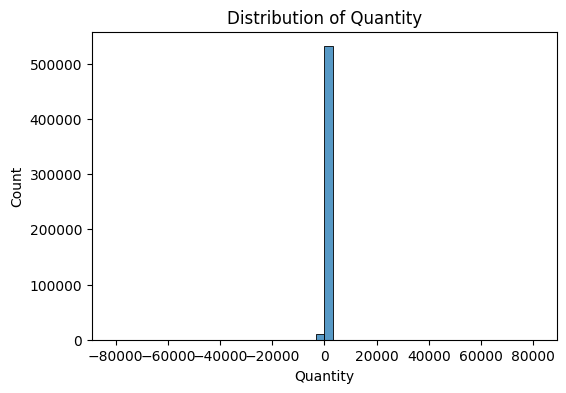

In [65]:

plt.figure(figsize=(6,4))
sns.histplot(df["Quantity"], bins=50)
plt.title("Distribution of Quantity")
plt.xlabel("Quantity")
plt.ylabel("Count")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">
<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>
The histogram shows that the Quantity column is heavily skewed.Both positive and negative Quantity values are concentrated around zero because most transactions involve small purchase or return quantities. Large bulk transactions act as outliers, stretching the scale and visually compressing values near the center.

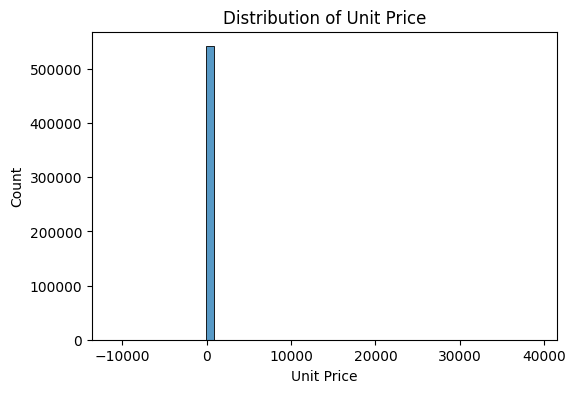

In [66]:
plt.figure(figsize=(6,4))
sns.histplot(df["UnitPrice"], bins=50)
plt.title("Distribution of Unit Price")
plt.xlabel("Unit Price")
plt.ylabel("Count")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">
<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>
The UnitPrice distribution shows both positive and negative values. Negative prices correspond to refunded or cancelled transactions. The distribution is highly right-skewed with a large concentration near zero, indicating that most products are sold at relatively low prices, while a few extreme values act as outliers.

### Bivariate Analysis-Bivariate analysis studies the relationship between two variables to understand how one feature influences another.

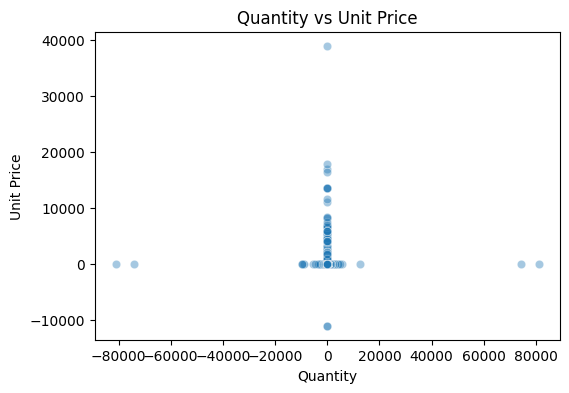

In [67]:

plt.figure(figsize=(6,4))
sns.scatterplot(
    x=df["Quantity"],
    y=df["UnitPrice"],
    alpha=0.4
)
plt.xlabel("Quantity")
plt.ylabel("Unit Price")
plt.title("Quantity vs Unit Price")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">
<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>
The scatter plot between Quantity and Unit Price shows a high concentration of points near the origin, indicating that most transactions involve small quantities and low-priced items. Negative values in both Quantity and Unit Price represent returned or cancelled transactions. A few extreme values create outliers, causing the majority of data points to cluster near the center. Overall, no strong linear relationship is observed between Quantity and Unit Price.

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">
<h2 align="left"><font color=#DCEEFF>Explanation:</font></h2>
During the Exploratory Data Analysis (EDA) phase, I analyzed each column individually (univariate) and in combination with other variables (bivariate) to understand their relationship with customer purchasing behavior.The Quantity reflects purchase volume buying density.It is used to identify high volume customers and bulk-buyers.Unit Price helps differentiate price-sensitive customers from premium buyers.Invoice Date forms the base for Recency in RFM.Customer ID acts as the grouping key for customer-level analysis.

<a id="read"></a>
# <p style="background-color:#0B2545 ; font-family:calibri; color:#DCEEFF; font-size:150%; text-align:center; border-radius:15px 50px;">Step 4|Data Cleaning & Preprocessing</p>

In [68]:
df=df[(df["Quantity"]>0)&(df["UnitPrice"]>0)]

In [69]:
df=df[~df["InvoiceNo"].str.startswith("C")]

In [70]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,530104.000000,530104.000000,397884.000000
mean,10.542037,3.907625,15294.423453
std,155.524124,35.915681,1713.141560
min,1.000000,0.001000,12346.000000
25%,1.000000,1.250000,13969.000000
50%,3.000000,2.080000,15159.000000
75%,10.000000,4.130000,16795.000000
max,80995.000000,13541.330000,18287.000000


In [71]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 530104 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    530104 non-null  object 
 1   StockCode    530104 non-null  object 
 2   Description  530104 non-null  object 
 3   Quantity     530104 non-null  int64  
 4   InvoiceDate  530104 non-null  object 
 5   UnitPrice    530104 non-null  float64
 6   CustomerID   397884 non-null  float64
 7   Country      530104 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 36.4+ MB


In [72]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     132220
Country             0
dtype: int64

In [73]:
df["InvoiceDate"]=pd.to_datetime(df["InvoiceDate"],errors="coerce")
df["CustomerID"]=df["CustomerID"].fillna("Unkonwn")

In [74]:
df.to_csv("validate.csv",index=False)

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>

* __Handling Quantity & Unit Price__: Negative values usually represent returned or cancelled orders.
Removing them ensures that only valid purchase transactions remain, which gives a true representation of customer buying behaviour.

* __Removing Cancelled Invoices__: Invoices starting with “C” indicate cancelled transactions.By removing them, you kept only completed and valid sales in your dataset.    
    
* __Checking Summary__:revealed that there is a large variation in Quantity and UnitPrice values — confirming the presence of outliers and different spending patterns among customers.
    
* __Dtype Changes__:This allows us to calculate Recency later (number of days since last purchase).
Datetime conversion is essential for  RFM analysis.
  
* __Handling Missing CustomerID__:This ensures the dataset remains consistent without dropping many rows.


<a id="read"></a>
# <p style="background-color:#0B2545 ; font-family:calibri; color:#DCEEFF; font-size:150%; text-align:center; border-radius:15px 50px;">Step 5 |Feature Engineering</p>

In [75]:
# for finding total Sales  value
df["TotalAmount"]=df["Quantity"]*df["UnitPrice"]

In [76]:
# Recency
snapshot_date=df["InvoiceDate"].max()+pd.Timedelta(days=1)
last_purchase=df.groupby("CustomerID")["InvoiceDate"].max()
recency=(snapshot_date-last_purchase).dt.days
rfm=pd.DataFrame()
rfm["Recency"]=recency

In [77]:
# Frequency
frequency=df.groupby("CustomerID")["InvoiceNo"].nunique()
rfm["Frequency"]=frequency

In [78]:
# Monetory
monetory=df.groupby("CustomerID")["TotalAmount"].sum()
rfm["Monetory"]=monetory

In [79]:
rfm.describe()

,Recency,Frequency,Monetory
count,4339.000000,4339.000000,4.339000e+03
mean,92.515326,4.600138,2.458328e+03
std,100.012295,22.943499,2.809265e+04
min,1.000000,1.000000,3.750000e+00
25%,18.000000,1.000000,3.074300e+02
50%,51.000000,2.000000,6.745200e+02
75%,142.000000,5.000000,1.662060e+03
max,374.000000,1428.000000,1.755277e+06


In [80]:
rfm.head()

,Recency,Frequency,Monetory
CustomerID,,,
12346.0,326,1,77183.60
12347.0,2,7,4310.00
12348.0,75,4,1797.24
12349.0,19,1,1757.55
12350.0,310,1,334.40


<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>

* __RFM Creation__:R- Number of days since the customer’s last purchase
                   F-Total number of purchases made by the customer
                   M-Total amount spent by the customer                   

* __rfm.describe()__: Recency shows a wide range, indicating both recently active and long-inactive customers;Frequency is right-skewed, meaning most customers purchase infrequently while a few purchase very often;Monetary has extreme high values, indicating the presence of high-value customers and outliers.
    
* __Log Transformation__:Log transformation reduces skewness and compresses extreme values, making the data more normally distributed and suitable for clustering algorithms.
    

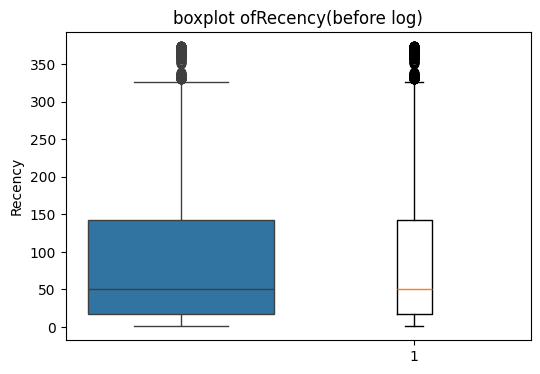

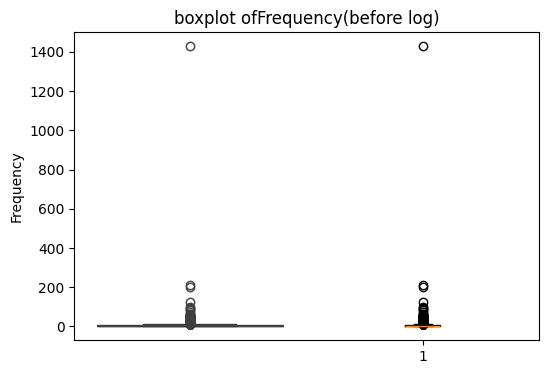

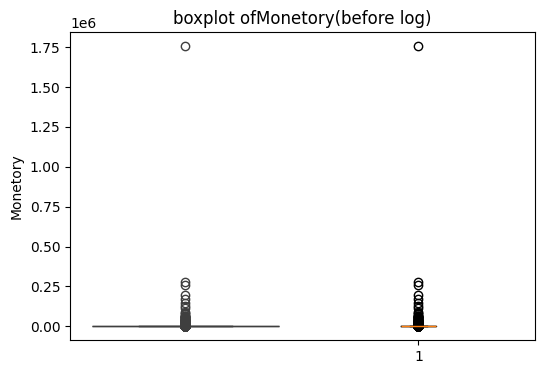

In [81]:
rfm_cols=["Recency","Frequency","Monetory"]
for col in rfm_cols:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=rfm[col])
    plt.boxplot(rfm[col])
    plt.title(f"boxplot of{col}(before log)")
    plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>

* __Recency Boxplot__:The distribution of Recency is right-skewed.Most customers made a purchase recently, as shown by the lower median value.A small number of customers have very high recency values, indicating customers who have not purchased for a long time.

* __Frequency Boxplot__: The Frequency distribution is highly skewed.A small group of customers purchase very frequently, resulting in several high-value outliers.This highlights the existence of loyal and repeat customers compared to one-time buyers.

* __Monetory Boxplot__:Monetary values show extreme outliers and right skewed.Most if the customers have very low to moderate spending,which is concentrated near the lower end of the scale.A very small customers show extremely high spending values,appearing as strong outliers far from the box.suck skewness can dominate the clustering algorithms.

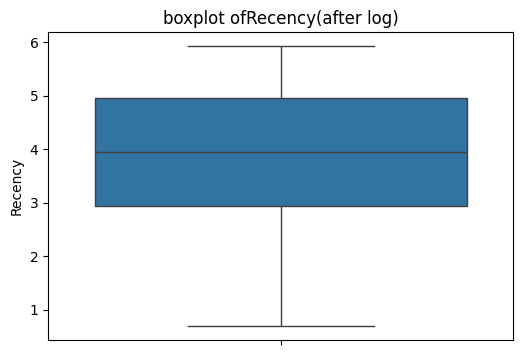

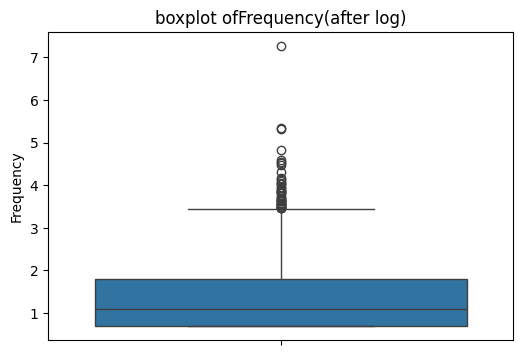

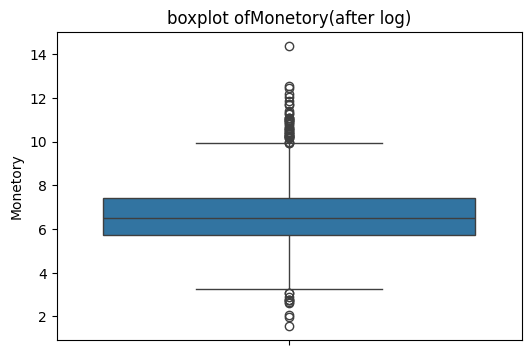

In [82]:
# Log Transformation
rfm_log=np.log1p(rfm[["Recency","Frequency","Monetory"]])
for col in rfm_log:
    plt.figure(figsize=(6,4))
    sns.boxplot(y=rfm_log[col])
    plt.title(f"boxplot of{col}(after log)")
    plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>

* __Recency Boxplot after log__:The Recency distribution is now more symmetric compared to before log transformation.Extreme outliers have been significantly reduced.The median lies closer to the center of the box, indicating a balanced distribution

* __Frequency Boxplot after log__:After log transformation, the Frequency distribution becomes less skewed compared to the original data.Extreme high-frequency customers are still visible as outliers, but their distance from the main distribution is reduced.

* __Monetory Boxplot after log__:fter log transformation, the Monetary distribution becomes less skewed compared to the original data.Extreme high-spending customers are compressed closer to the main distribution, reducing their influence.This prevents high spenders from dominating the clustering process.

* Some outliers are still present, which is expected in real-world e-commerce data.


In [83]:
rfm_log.describe()

,Recency,Frequency,Monetory
count,4339.000000,4339.000000,4339.000000
mean,3.830011,1.346947,6.595421
std,1.340953,0.688911,1.262974
min,0.693147,0.693147,1.558145
25%,2.944439,0.693147,5.731495
50%,3.951244,1.098612,6.515483
75%,4.962845,1.791759,7.416415
max,5.926926,7.264730,14.378138


<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>

* __Recency log__:The mean and median values are closer compared to the original Recency values.Minimum and maximum values are compressed into a smaller range.

* __Frequency log__:Frequency values are more evenly distributed after log transformation.Extreme high-frequency customers are still present but with controlled influence.

* __Monetory log__:Monetary values show a significant reduction in skewness.Variability is reduced, making spending behavior more comparable across customers.


<a id="read"></a>
# <p style="background-color:#0B2545 ; font-family:calibri; color:#DCEEFF; font-size:150%; text-align:center; border-radius:15px 50px;">Step 6 |Feature Scaling</p>

In [84]:
scaler=StandardScaler()
rfm_scaled=scaler.fit_transform(rfm_log[["Recency","Frequency","Monetory"]])
rfm_scaled=pd.DataFrame(rfm_scaled,columns=["Recency","Frequency","Monetory"])

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>
 After Log transformation,we applied standard scaler to RFM features to normalize them from 0 to 1.We need scaling after log transformation because features are still on the different scales.The monetory value can still dominate distance calculations.so we scale to give equal importance to the features.


<a id="read"></a>
# <p style="background-color:#0B2545 ; font-family:calibri; color:#DCEEFF; font-size:150%; text-align:center; border-radius:15px 50px;">Step 7 |Model Building</p>

# K-Means Clustering

In [85]:
inertia=[]
silhouette_values=[]
K_range=range(2,11)
for k in K_range:
    kmeans=KMeans(n_clusters=k,random_state=42)
    labels=kmeans.fit_predict(rfm_scaled)
    inertia.append(kmeans.inertia_)
    sil = silhouette_score(rfm_scaled,labels)
    silhouette_values.append(sil)

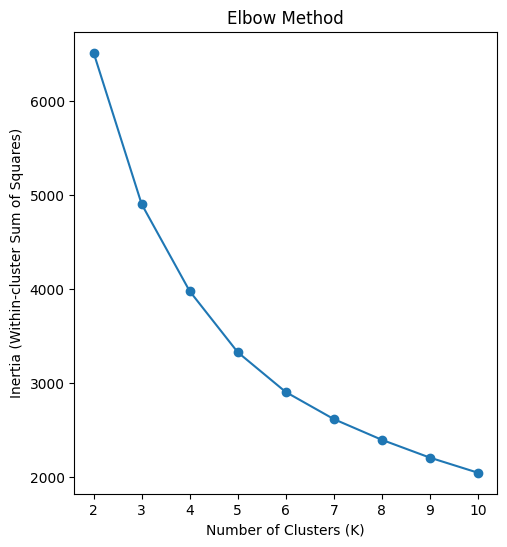

In [86]:
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(K_range, inertia, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Inertia (Within-cluster Sum of Squares)')
plt.title('Elbow Method')
plt.show()

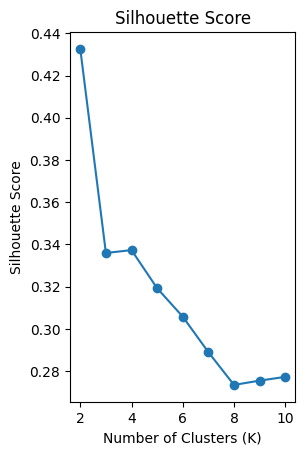

In [87]:
plt.subplot(1, 2, 2)
plt.plot(K_range, silhouette_values, marker='o', linestyle='-')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Score')
plt.show()

In [88]:
kmeans=KMeans(n_clusters=4,init="k-means++",n_init=10,random_state=42)
rfm["KMeans_Cluster"]=kmeans.fit_predict(rfm_scaled)

In [89]:
rfm["KMeans_Cluster"].value_counts()

KMeans_Cluster
2    1592
3    1180
0     850
1     717
Name: count, dtype: int64

In [90]:
rfm.groupby("KMeans_Cluster").mean()

,Recency,Frequency,Monetory
KMeans_Cluster,,,
0,19.309412,2.063529,531.814553
1,11.860530,15.663877,10491.076625
2,185.003769,1.321608,348.906671
3,69.475424,4.127966,1811.085435


<Axes: xlabel='PC1', ylabel='PC2'>

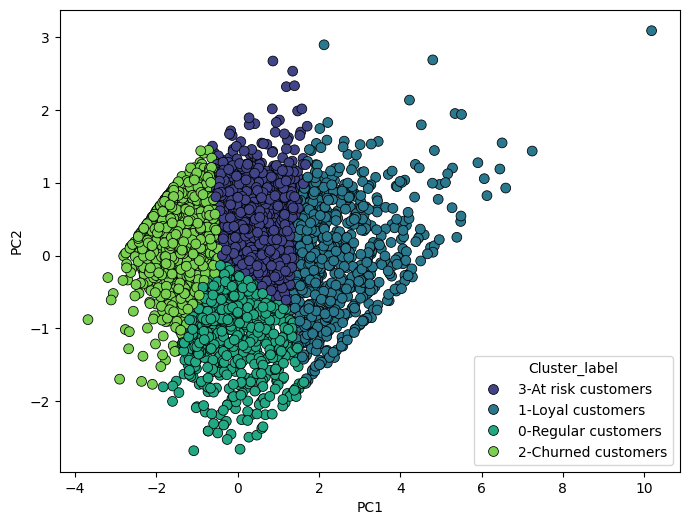

In [91]:
from sklearn.decomposition import PCA
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(rfm_scaled)
pca_df=pd.DataFrame(pca_transformed,columns=["PC1","PC2"])
pca_df["Cluster"]=rfm["KMeans_Cluster"].values

cluster_names_k={0:"0-Regular customers",
               1:"1-Loyal customers",
               2:"2-Churned customers",
               3:"3-At risk customers"}
 
pca_df["Cluster_label"]=pca_df["Cluster"].map(cluster_names_k)


plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1",
                y="PC2",
                hue="Cluster_label",
                data=pca_df,
                palette="viridis",
                s=50,
                edgecolor="black")

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>

* The plot shows four visually distinguishable clusters, which confirms that KMeans has grouped customers based on similar purchasing behavior.
* Some clusters overlap at the boundaries.This indicates that certain customers have similar RFM behavior across clusters.
   
* Some clusters are dense (compact), while others are more spread out.Spread-out clusters indicate higher variability in customer behavior.Some cluster overlap exists in PCA space.


<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Explanation:</font></h2>

* The optimal number of clusters was identified as K = 4, where the reduction in inertia starts to slow down, indicating diminishing returns beyond this point. This suggests that four clusters provide a good balance between model simplicity and cluster compactness.
* However, the Silhouette Score achieved its highest value at K = 2, indicating that the data naturally forms two well-separated and clusters.They may oversimplify the underlying customer behavior.
* Considering the business objective of customer segmentation, K = 4 was selected as the final number of clusters.This choice allows for more customer segments, enabling better differentiation in terms of recency, frequency, and monetary value.
* Using K = 4 helps identify distinct customer groups such as high-value loyal customers, frequent buyers, occasional customers, and low-value or inactive customers.


# Hierarchical Clustering

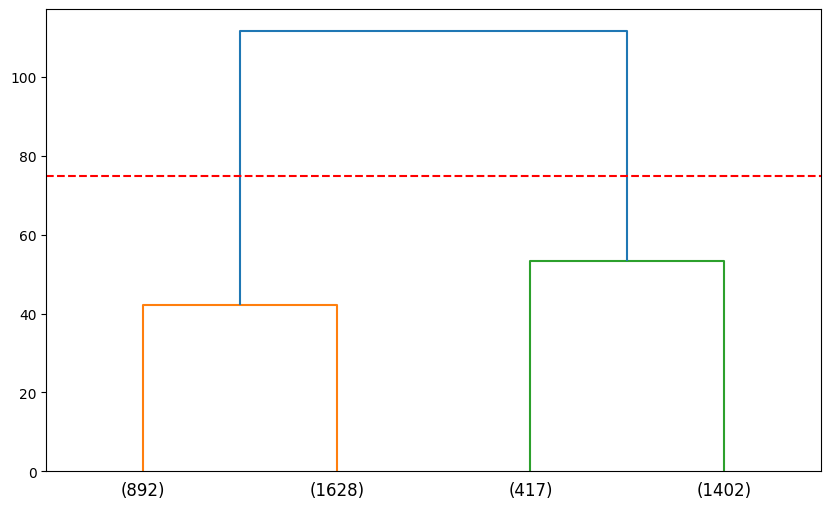

In [92]:
# Dendrogram
linked=linkage(rfm_scaled,method="ward")
plt.figure(figsize=(10,6))
dendrogram(linked,truncate_mode="lastp",p=4,color_threshold=90)
plt.axhline(y=75,color="r",linestyle="--")
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>

* It works by starting with data point as a individual cluster and gradually merges the closest cluster,Until it forms a tree like structure.
* The two most similar customers are merged into a pair. Then, that pair is merged with the next most similar point, and so on. This continues until all customers are connected into one giant tree.
* I generated dendrogram using the ward linkage method because it minimizes the varaince within each cluster.I used truncate_mode="lastp" to show only the main branches.
* We draw a horizontal line at a specific height(y=75).Usually at large vertical gap.This cuts defines how many final clusters we want.
*  There is a clear large vertical distance gap between 60 to 90.I placed a cut off line,I obserce four separate vertical branches,Hence K=4.
* Each independent vertical branch below the line is a cluster.The role of blue line are just just connection paths.
        

In [93]:
# HC Model
from sklearn.cluster import AgglomerativeClustering
Hc=AgglomerativeClustering(n_clusters=4,metric="euclidean",linkage="ward")
rfm["HC_Cluster"]=Hc.fit_predict(rfm_scaled)

In [94]:
# Counts
rfm["HC_Cluster"].value_counts()

HC_Cluster
0    1628
1    1402
3     892
2     417
Name: count, dtype: int64

In [95]:

rfm.groupby("HC_Cluster").mean()

,Recency,Frequency,Monetory,KMeans_Cluster
HC_Cluster,,,,
0,76.692875,1.765356,699.397435,1.551597
1,38.343081,4.952924,1953.004280,1.930100
2,8.076739,21.592326,15726.370240,1.000000
3,246.012332,1.275785,260.153733,2.008969


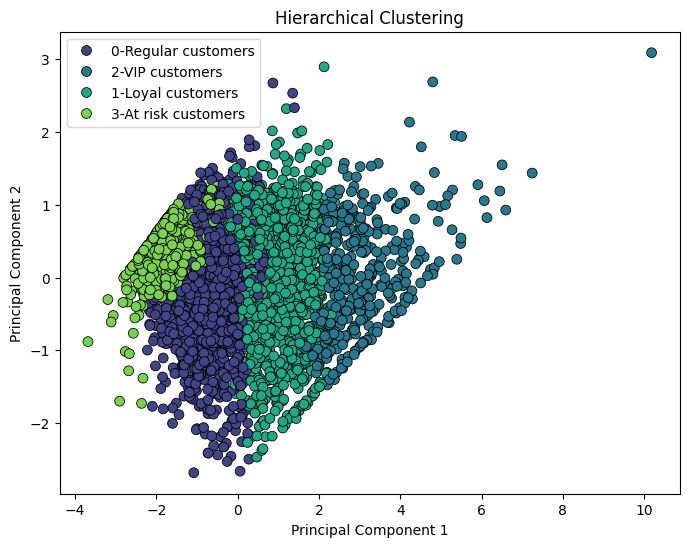

In [96]:
# PCA Visualization
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(rfm_scaled)
pca_df=pd.DataFrame(pca_transformed,columns=["PC1","PC2"])
pca_df["Cluster"]=rfm["HC_Cluster"].values

cluster_names_hc={0:"0-Regular customers",
               1:"1-Loyal customers",
               2:"2-VIP customers",
               3:"3-At risk customers"}
 
pca_df["Cluster_label"]=pca_df["Cluster"].map(cluster_names_hc)


plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1",
                y="PC2",
                hue="Cluster_label",
                data=pca_df,
                palette="viridis",
                s=50,
                edgecolor="black")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("Hierarchical Clustering")
plt.legend()

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>

* This reflects how hierarchical clustering groups customers based on distance hierarchy rather than fixed centroids.Some overlap exists between clusters in PCA space.
* The PCA visualization of hierarchical clustering shows meaningful and naturally formed customer segments. While some overlap exists, the clusters reflect real-world customer behavior patterns without forcing strict boundaries.
* Hierarchical clustering is sensitive to noise and outliers and may not scale well for large datasets.

# DBSCAN

In [97]:
# K-Distance Graph
from sklearn.neighbors import NearestNeighbors
nn=NearestNeighbors(n_neighbors=6)
nn.fit(rfm_scaled)
distances,indices=nn.kneighbors(rfm_scaled)
distances=np.sort(distances,axis=0)
k_distances=distances[:,5]

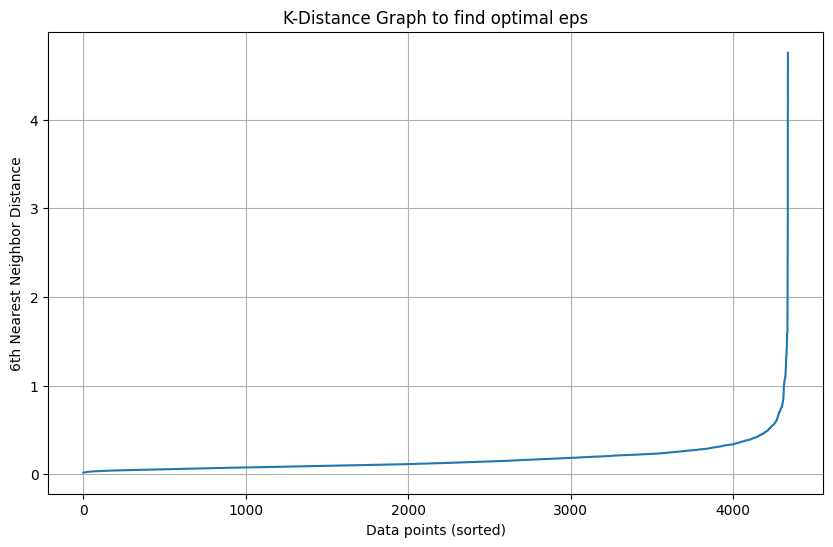

In [98]:
# Plot
plt.figure(figsize=(10,6))
plt.plot(k_distances)
plt.xlabel("Data points (sorted)")
plt.ylabel("6th Nearest Neighbor Distance")
plt.title("K-Distance Graph to find optimal eps")
plt.grid()
plt.show()

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>

*  DBSCAN is a density based algorithms which clusters the customers and detect the outliers.Here, it is calculated based on distance so, I used rfm_scaled which I used in the above other two algorithms.
* DBSCAN requires a parameter called min_samples-- which defines the minimum number of ponts required to form a base region.
* The rule used for min_samples--2* no.of dimensions.
*  It also requires the eps(epsilon) parameter-- which defines the maximum distances within which points are considered neighbors.It can't be chosen randomly.For finding this I used K-distane graph method.
*  The curve remain relatively flat for most of the data points-- dense regions(clusters).A sharp upward bend appears towards the end--outliers.
*  The Elbow Point can be chosen 0.4 to 0.6.but I chosen eps=0.6 and used the same min_samples.


In [99]:
# Cluster distribution check
dbscan=DBSCAN(eps=0.5,min_samples=6)
rfm["DBSCAN_Cluster"]=dbscan.fit_predict(rfm_scaled)
rfm["DBSCAN_Cluster"].value_counts()

DBSCAN_Cluster
 0    2788
 1    1484
-1      65
 2       2
Name: count, dtype: int64

In [100]:
# Cluster values replace
rfm["Final_Segment"]=rfm["DBSCAN_Cluster"].replace(2,-1)

In [101]:
# Outliers data
outliers_data=rfm[rfm["DBSCAN_Cluster"].isin([-1,2])]
outliers_data.head()

,Recency,Frequency,Monetory,KMeans_Cluster,HC_Cluster,DBSCAN_Cluster,Final_Segment
CustomerID,,,,,,,
12346.0,326,1,77183.60,3,0,-1,-1
12357.0,33,1,6207.67,3,0,-1,-1
12409.0,79,3,11072.67,3,1,-1,-1
12415.0,24,21,124914.53,1,2,-1,-1
12433.0,1,7,13375.87,1,2,-1,-1


<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>

The reason for merging cluster 2 with noise because it exhibits the high RFM values.Since their behavioue is high compared to the rest of the population,it is more logical to merge all such group high outier into one group thaat represents them as the Special VIP persons.
So that we can ensure that our final segementation is clean,actionable and focused on the primary density regions of our customer base.

In [102]:
# final segment cluster 
final_profile=(rfm[rfm["Final_Segment"]!=-1].groupby("Final_Segment")[["Recency","Frequency","Monetory"]].mean())
final_profile

,Recency,Frequency,Monetory
Final_Segment,,,
0,59.199785,5.359039,2001.921472
1,156.917116,1.000000,355.884718


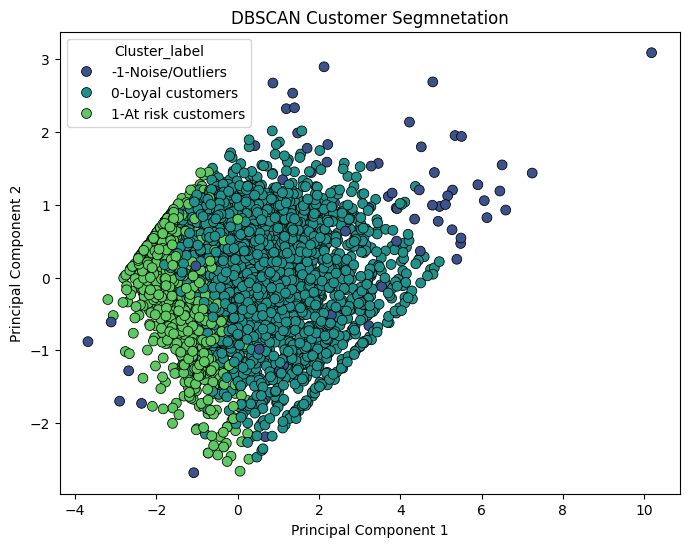

In [103]:
# PCA Visualization
pca=PCA(n_components=2)
pca_transformed=pca.fit_transform(rfm_scaled)
pca_df=pd.DataFrame(pca_transformed,columns=["PC1","PC2"])
pca_df["Cluster"]=rfm["Final_Segment"].values

cluster_names_db={0:"0-Loyal customers",
               1:"1-At risk customers",
              -1:"-1-Noise/Outliers"}
 
pca_df["Cluster_label"]=pca_df["Cluster"].map(cluster_names_db)


plt.figure(figsize=(8,6))
sns.scatterplot(x="PC1",
                y="PC2",
                hue="Cluster_label",
                data=pca_df,
                palette="viridis",
                s=50,
                edgecolor="black")
plt.xlabel("Principal Component 1")
plt.ylabel("Principal Component 2")
plt.title("DBSCAN Customer Segmnetation")
plt.show()



 <div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">
<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>
     
The visualisation appears crowded because it represents our high density customer base.While the PCA projection onto 2D space creates visual overlap,the underlying alogorithm  has separated them based on Cluster 0 and Cluster 1 and extreme outlier.
DBSCAN identifies dense customer groups and explicitly separates noise points, providing more realistic customer segmentation compared to centroid-based methods.”


<a id="read"></a>
# <p style="background-color:#0B2545 ; font-family:calibri; color:#DCEEFF; font-size:150%; text-align:center; border-radius:15px 50px;">Step 8 |Model Selection </p>

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Inferences:</font></h2>

*  K-Means clustering was selected as the final customer segmentation technique after comparing it with Hierarchical Clustering and DBSCAN because it provided the best balance between cluster stability, scalability, interpretability, and business applicability.
  
*  Although K-Means is theoretically sensitive to outliers, this limitation was effectively addressed through RFM-based feature engineering, log transformation to reduce right-skewness, and standard/robust scaling, which significantly minimized the influence of extreme values. As a result, K-Means produced well-separated and balanced clusters that represented meaningful customer segments such as VIP, Loyal, Regular, and At-Risk customers.

*  In contrast, Hierarchical Clustering, while useful for understanding the natural grouping of customers and validating the optimal number of clusters through dendrogram analysis, is computationally expensive and not scalable for large datasets, making it unsuitable for production-level deployment.

*  DBSCAN, on the other hand, demonstrated strong outlier detection capability by identifying noise points, but it failed to assign all customers to clusters and was highly sensitive to the choice of parameters such as epsilon and minimum samples. This resulted in several valid customers being labeled as noise, which is undesirable in customer segmentation where every customer must belong to a segment for marketing and strategic actions.

*  Therefore, considering complete customer coverage, ease of interpretation, computational efficiency, and direct alignment with business objectives, K-Means clustering was selected as the most effective and practical model for customer segmentation in this project.
            

<a id="read"></a>
# <p style="background-color:#0B2545 ; font-family:calibri; color:#DCEEFF; font-size:150%; text-align:center; border-radius:15px 50px;">Step 9 |Business Interpretation & Marketing Strategy </p>

In [104]:
# Cluster profiling
rfm["Final_Customer_Segment"]=rfm["KMeans_Cluster"].map(cluster_names_k)
rfm.groupby("Final_Customer_Segment")[["Recency","Frequency","Monetory"]].mean()

,Recency,Frequency,Monetory
Final_Customer_Segment,,,
0-Regular customers,19.309412,2.063529,531.814553
1-Loyal customers,11.860530,15.663877,10491.076625
2-Churned customers,185.003769,1.321608,348.906671
3-At risk customers,69.475424,4.127966,1811.085435


<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Interpretation:</font></h2>

*  __Loyal Customers__: Loyal customers are highly engaged and purchase frequently with significant spending. They demonstrate strong brand loyalty and are critical for long-term business sustainability.
*  __Regular Customers__: Regular customers make occasional purchases but do not show strong loyalty or high spending behavior. They form a stable base of customers but contribute limited revenue individually. With proper engagement strategies, this segment has potential to move into higher-value categories.
*  __At Risk Customers__: At-risk customers have historically spent high amounts but have not purchased recently. Losing this segment could result in significant revenue loss if not addressed immediately.
*  __Churned Customers__: These customers have not interacted with the business for a long time and show minimal engagement. They are likely churned and contribute very little to current revenue.


<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Strategy:</font></h2>

*  __Loyal Customers__: Exclusive loyalty rewards and early access and dedicated support.
*  __Regular Customers__: Upselling through personalized recommendations and bulk-purchase discounts.
*  __At Risk Customers__: Win-back campaigns,limited-time coupons.
*  __Churned Customers__: Re-activation offers and "We Miss you" emails with special discount codes.

<a id="read"></a>
# <p style="background-color:#0B2545 ; font-family:calibri; color:#DCEEFF; font-size:150%; text-align:center; border-radius:15px 50px;">Step 10 |Building a predictive classifier </p>

## Random Forest

In [105]:
# Feature(x) & Target(y)
x=rfm_scaled
y=rfm["Final_Customer_Segment"]

In [106]:
# train test split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [107]:
# random forest model
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(n_estimators=300,random_state=42,class_weight="balanced")
rf_model.fit(x_train,y_train)

,n_estimators,300
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [108]:
# predict model
y_pred=rf_model.predict(x_test)

In [109]:
# Evaluation
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 0.9711981566820277

Classification Report:

                     precision    recall  f1-score   support

0-Regular customers       0.97      0.98      0.98       170
  1-Loyal customers       0.96      0.97      0.97       143
2-Churned customers       0.98      0.98      0.98       319
3-At risk customers       0.97      0.95      0.96       236

           accuracy                           0.97       868
          macro avg       0.97      0.97      0.97       868
       weighted avg       0.97      0.97      0.97       868



<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Inference:</font></h2>

*  The Random Forest classifier was trained to predict the final customer segments derived from the unsupervised clustering stage.
*  The model achieved an overall accuracy of approximately 97%, indicating a strong ability to correctly classify customers into their respective segments.
*  The precision, recall, and F1-score values are consistently high across all customer segments (Regular, Loyal, Churned, and At-Risk customers). This shows that the model performs well not only on majority classes but also on minority segments.
*  Overall, the Random Forest model demonstrates strong generalization capability and successfully learns the underlying patterns in the RFM features to predict customer segments accurately.

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Explanation:</font></h2>
 Random Forest was selected as the supervised learning model for this project due to the following reasons:
 
*  Random Forest is a tree-based ensemble model that handles non-linear relationships effectively, which is important for customer behavior data such as Recency, Frequency, and Monetary values.
*  It reduces overfitting by averaging multiple decision trees, resulting in stable and reliable predictions.
*  The model is robust to outliers and skewed distributions, which are common in transactional and RFM-based datasets.
*  The model provides high accuracy and balanced precision-recall scores across all customer segments, making it suitable for multi-class customer segmentation prediction.
 Hence, Random Forest was chosen as an effective and reliable model to predict customer segments based on historical purchasing behavior.


*  The precision, recall, and F1-score values are consistently high across all customer segments (Regular, Loyal, Churned, and At-Risk customers). This shows that the model performs well not only on majority classes but also on minority segments.
*  Overall, the Random Forest model demonstrates strong generalization capability and successfully learns the underlying patterns in the RFM features to predict customer segments accurately.

## Light GBM

In [110]:
# Feature(X) & Target(y)
x=rfm_scaled
y=rfm["Final_Customer_Segment"]

In [111]:
# Train Test Split
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42,stratify=y)

In [112]:
# Light GBM Model
from lightgbm import LGBMClassifier
lgbm_model = LGBMClassifier(n_estimators=300,learning_rate=0.05,max_depth=-1,random_state=42,class_weight="balanced")
lgbm_model.fit(x_train,y_train)

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000089 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 539
[LightGBM] [Info] Number of data points in the train set: 3471, number of used features: 3
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Info] Start training from score -1.386294
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with posi

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.05
,n_estimators,300
,subsample_for_bin,200000
,objective,None
,class_weight,'balanced'
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [113]:
# Predict
y_pred_1=lgbm_model.predict(x_test)

In [114]:
# Evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n")
print(classification_report(y_test,y_pred))

Accuracy: 0.9711981566820277

Classification Report:

                     precision    recall  f1-score   support

0-Regular customers       0.97      0.98      0.98       170
  1-Loyal customers       0.96      0.97      0.97       143
2-Churned customers       0.98      0.98      0.98       319
3-At risk customers       0.97      0.95      0.96       236

           accuracy                           0.97       868
          macro avg       0.97      0.97      0.97       868
       weighted avg       0.97      0.97      0.97       868



<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Inference:</font></h2>

*  The LightGBM classifier shows strong performance in predicting customer segments based on RFM features.
*  The model achieved an overall accuracy of approximately 97%, indicating that it correctly classifies the majority of customers into their respective segments.
*  From the classification report, precision, recall, and F1-scores are consistently high across all customer categories such as Regular, Loyal, Churned, and At-Risk customers. This indicates that the model is not biased toward any single class and performs well even for minority segments.
*  The high recall for churned and at-risk customers is particularly important from a business perspective, as it ensures that customers likely to leave are correctly identified. 

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Explanation:</font></h2>

* LightGBM was chosen for this project because it is highly efficient and performs well on structured tabular data like RFM features.
* It can handle non-linear relationships between Recency, Frequency, and Monetary values, which are common in customer behavior data. LightGBM also handles class imbalance effectively when combined with balanced class weights.
* Compared to simpler models, LightGBM trains faster, reduces overfitting through leaf-wise tree growth, and provides higher accuracy. These properties make it well-suited for predicting customer segments in large-scale e-commerce datasets.

<a id="read"></a>
# <p style="background-color:#0B2545 ; font-family:calibri; color:#DCEEFF; font-size:150%; text-align:center; border-radius:15px 50px;">Step 11 |Model Selection for Prediction </p>

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Explanation:</font></h2>

* Random Forest was first used as a baseline model and demonstrated strong performance, confirming that Recency,Frequency, and Monetary variables are effective predictors of customer behavior.
* LightGBM was then implemented,which allows the
model to learn from previous errors and capture complex, non-linear relationships within customer purchasing patterns.
*  Although both Random Forest and LightGBM produced similar classification reports with an overall accuracy of approximately 97%, LightGBM was selected as the final model.
* This decision was based on its superior learning mechanism, better scalability, and more stable performance.
* Therefore, LightGBM was chosenas the optimal supervised learning model for this customer segmentation and prediction task.

<a id="read"></a>
# <p style="background-color:#0B2545 ; font-family:calibri; color:#DCEEFF; font-size:150%; text-align:center; border-radius:15px 50px;">Step 12|Model Deployment Using Streamlit</p>

In [115]:
from joblib import dump
dump(lgbm_model,"LightGB_Customer_Segmentation.joblib")
dump(scaler,"rfm_scaler.joblib")

['rfm_scaler.joblib']

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF>Explanation:</font></h2>

* This deployment step ensures that the trained LightGBM model are preserved for real-world usage.By saving the model and scaler, the system can predict customer segments for new incoming data without retraining.
* The trained LightGBM model and RFM scaler are deployed using a Streamlit-based interface.
* Streamlit provides a simple and interactive way to convert machine learning models into user-facing applications. The saved model is loaded, and users can input Recency, Frequency, and Monetary values to predict the customer segment in real time.
* The model predictions without retraining the model, making the solution practical and scalable for real-world business usage.



<a id="read"></a>
# <p style="background-color:#0B2545 ; font-family:calibri; color:#DCEEFF; font-size:150%; text-align:center; border-radius:15px 50px;">Step 13 |Conclusion </p>

<div style="border-radius:10px; padding: 15px; background-color:#0B2545; font-size:115%; text-align:left">

<h2 align="left"><font color=#DCEEFF></font></h2>

* This project focused on analyzing customer purchasing behavior using transactional data. After data cleaning and EDA, RFM analysis was applied to capture customer value effectively. Multiple clustering methods were explored, and K-Means was selected based on Elbow and Silhouette analysis. Customer segments were then predicted using supervised learning models. Random Forest and LightGBM were compared, and LightGBM was chosen for its efficient and consistent performance. The final model helps businesses identify and target customers more effectively and also bridges analytics and business by converting raw transaction data into actionable customer segments and deploying a scalable prediction system for real-world decision making.
